# Linear Regression

In [58]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)
from joblib import dump, load

# Load data

In [41]:
# Load the dataset
california = fetch_california_housing()

In [42]:
# Create a DataFrame for the data
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target  # Adding the target variable

In [43]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [44]:
# For multiple linear regression, we'll use more features
X = df.drop('MedHouseVal', axis=1)  # Using all features except the target
y = df['MedHouseVal']

# Exploratory Data Analysis

Besides the EDAs shown below. What others would you do? What actions will you take based on these findings?

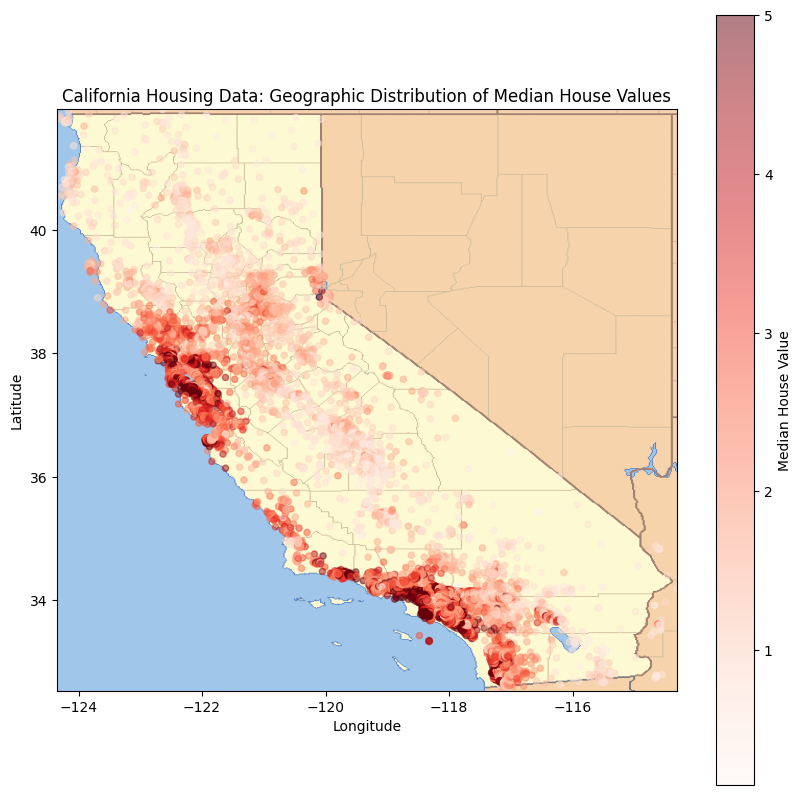

In [45]:
#Geographical Plot

# Latitude and Longitude from the dataset
latitude = df['Latitude']
longitude = df['Longitude']

# Load the image of the California map
# Ensure the map image file is in your working directory and that it's a Mercator projection map
california_map = mpimg.imread('california.png')  # replace with your image file path

# Create a new figure, set the aspect ratio you want
fig, ax = plt.subplots(figsize=(10, 10))

# Set the extent of your map image and data (this will likely require some trial and error to get right)
BBox = (df['Longitude'].min(), df['Longitude'].max(),
         df['Latitude'].min(), df['Latitude'].max())

# Display the image with the correct geographical extent
ax.imshow(california_map, zorder=0, extent = BBox, aspect= 'equal')

# Scatter plot of the data points, colored by median house value and using a color map
sc = plt.scatter(longitude, latitude, zorder=1, c=df['MedHouseVal'], cmap='Reds', alpha=0.5, s=20)

# Set the title and labels
ax.set_title('California Housing Data: Geographic Distribution of Median House Values')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

# Adding a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Median House Value')

plt.show()

In [46]:
# Summary statistics
display(df.describe())

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [47]:
# Check for missing data
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<Axes: >

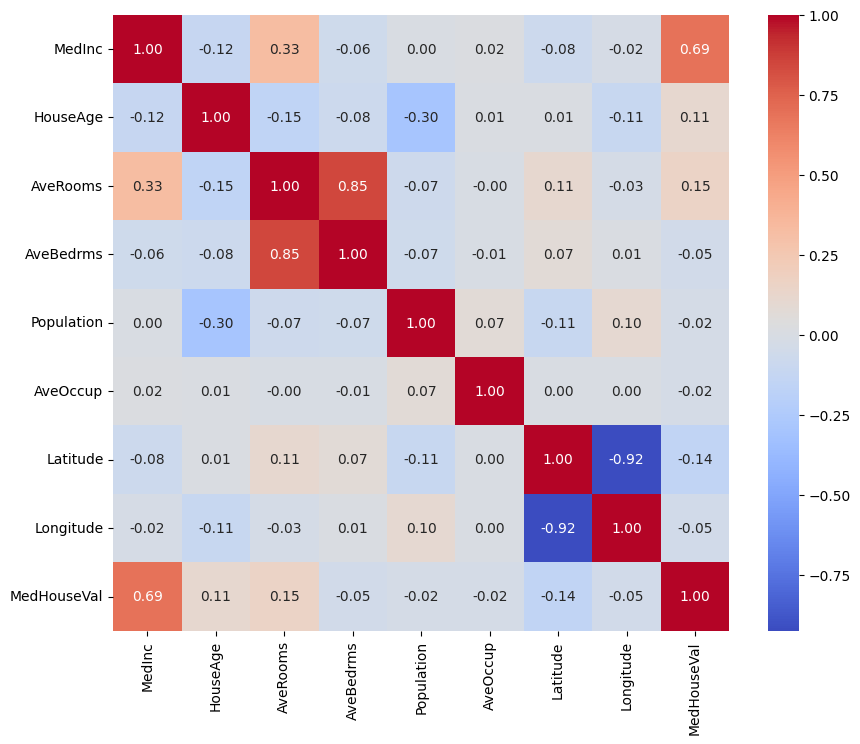

In [48]:
# Correlation matrix and heatmap

correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)

# 🛁 Data cleaning

Included but not limited to:
- Handling missing values: drop them or account for them
- Handling outliers: drop them or account for them or keep them
- Remove duplicates
- Handling incorrect data types
- Handling inconsistent data (example: age shouldn't be negative)


# Split dataset into train, test

### **ALWAYS** before feature engineering and modeling

The primary reason for performing a train/test split before feature engineering and modeling is to prevent data leakage and to ensure that the evaluation of your model is accurate and indicative of its performance on unseen data.

- Prevention of Data Leakage
- Accurate Evaluation
- Ethical Modeling Practices

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🏗 Feature engineering

Included but not limited to:
- Handling categorical attributes
  - Ordinal encoder: Assumes two nearby values are more similar to each other
  - One-Hot encoder: One binary category per attribute
- Custom feature engineering ♊
- Feature scaling
  - MinMax
  - Standarization


# Machine Learning

In [50]:
# Create a linear regression model
regressor = LinearRegression()

In [51]:
# Fit the model on the training data
regressor.fit(X_train, y_train)

LinearRegression()

# Get results

In [52]:
# Make predictions using the testing set
y_pred = regressor.predict(X_test)

In [53]:
# Model evaluation
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.56
Coefficient of determination (R^2): 0.58


- The MSE represents the average of the squares of the errors, which is the average squared difference between the actual house prices and the prices predicted by your model. In the context of the California housing data, an MSE of 0.56 indicates that, on average, the predictions made by your model are about √0.56 (approximately 0.75 when considering the target's scale, typically in units of hundreds of thousands of dollars) away from the actual value, squared.

- R^2 indicates the proportion of variance in the dependent variable (house prices) that's predictable from the independent variables (features like median income, house age, etc.) in your model. An R^2 of 0.58 suggests that approximately 58% of the variability in house prices across California can be explained by the features included in your model.

# Interpretation

In [54]:
# Displaying intercept
print(regressor.intercept_)

-37.02327770606409


This implies that if all the independent variables were set to zero (which would mean zero median income, houses of zero age, zero average rooms, etc.), the predicted median house value would be -37.02. This obviously doesn't make practical sense, as you can't have zero income, zero rooms, or negative house values.

The value of the intercept by itself, especially in multiple regression with several predictors, doesn't usually have a meaningful interpretation in isolation, as it represents the predicted value of the dependent variable when all the independent variables are zero. In many practical scenarios, the condition of "all independent variables being zero" may not make sense.

In [55]:
# Displaying coefficients for each feature
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
display(coefficients)

Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708

The coefficients in a linear regression model represent the relationship between each independent variable and the dependent variable.

- **MedInc (Median Income)**: A coefficient of 0.448675 means that for each unit increase in the median income, holding all other features constant, the median house value is expected to increase by 0.448675 unit. This suggests that there's a positive correlation between the district's median income and its median house value.

- **HouseAge**: The positive coefficient of 0.009724 suggests a slight positive relationship between the age of the house and the median house value, meaning older houses tend to be slightly more expensive, all else being equal. However, this effect is very small.

- **AveRooms (Average Rooms)**: The negative coefficient of -0.123323 indicates that for each additional room, the median house value tends to decrease by 0.123323 unit, all else being equal. This might seem counterintuitive, but it could be due to larger homes (more rooms) being located in less expensive areas, or it could be capturing some other effect where an increase in rooms does not correspond to an increase in house quality or desirability.

- **AveBedrms (Average Bedrooms)**: With a coefficient of 0.783145, the model suggests that for each unit increase in the number of bedrooms, holding all other features constant, the median house value increases by 0.783145 units. This might reflect the fact that houses with more bedrooms are typically larger and cost more, although the high coefficient in comparison to AveRooms might suggest data issues or multicollinearity.

- **Population**: The coefficient is very close to zero (-0.000002), suggesting that the total population in a block has an extremely minimal (and slightly negative) impact on the median house value, all else being equal.

- **AveOccup (Average Occupancy)**: The negative coefficient of -0.003526 suggests that for each unit increase in average occupancy, the median house value decreases by 0.003526 units, all else being equal. This could possibly reflect a negative perception of overcrowding.

- **Latitude and Longitude**: Both coefficients are negative (-0.419792 and -0.433708, respectively), indicating that there's a decrease in median house value as you move north (increase in latitude) or east (increase in longitude). This might capture geographic pricing trends, such as higher prices on the coast versus inland.

Remember, these coefficients are calculated based on the specific dataset and the relationships in this particular set of data. They represent the average change in the dependent variable (median house value) for one unit of change in the independent variable while holding other variables in the model constant. Also, these are "ceteris paribus" interpretations, meaning they assume all other factors are held constant, which is a statistical, not necessarily realistic, condition. Lastly, correlation does not imply causation, and these coefficients do not imply a causal relationship.

# Deploy

In [57]:
# Let's say we have new data as an example
new_data = np.array([[8.0, 30, 6, 1000, 400, 3.5, 34, -118]]) # Example input for all 8 features
new_prediction = regressor.predict(new_data)
print("Predicted median house value for the input data: $%.2fK" % (new_prediction[0]*1000))

Predicted median house value for the input data: $786154.27K


In [59]:
# Save the model to a file
dump(regressor, 'regressor.joblib')

# Load the model back in
regressor_from_joblib = load('regressor.joblib')

# Use the model to make predictions
new_prediction = regressor_from_joblib.predict(new_data)
print("Predicted median house value for the input data: $%.2fK" % (new_prediction[0]*1000))

Predicted median house value for the input data: $786154.27K
